# View Clusters and Simulate Behaviors
Based on provided behavior and controller files in the pheno_home and geno_home variables

In [2]:
from NovelSwarmBehavior.novel_swarms.behavior.AngularMomentum import AngularMomentumBehavior
from NovelSwarmBehavior.novel_swarms.behavior.AverageSpeed import AverageSpeedBehavior
from NovelSwarmBehavior.novel_swarms.behavior.GroupRotationBehavior import GroupRotationBehavior
from NovelSwarmBehavior.novel_swarms.behavior.RadialVariance import RadialVarianceBehavior
from NovelSwarmBehavior.novel_swarms.behavior.ScatterBehavior import ScatterBehavior
from NovelSwarmBehavior.novel_swarms.behavior.SensorOffset import GeneElementDifference
from NovelSwarmBehavior.novel_swarms.config.AgentConfig import DiffDriveAgentConfig
from NovelSwarmBehavior.novel_swarms.novelty.BehaviorDiscovery import BehaviorDiscovery
from NovelSwarmBehavior.novel_swarms.config.EvolutionaryConfig import GeneticEvolutionConfig
from NovelSwarmBehavior.novel_swarms.config.WorldConfig import RectangularWorldConfig
from NovelSwarmBehavior.novel_swarms.config.defaults import ConfigurationDefaults
from NovelSwarmBehavior.novel_swarms.novelty.GeneRule import GeneRule
from NovelSwarmBehavior.novel_swarms.config.OutputTensorConfig import OutputTensorConfig
from NovelSwarmBehavior.novel_swarms.sensors.BinaryLOSSensor import BinaryLOSSensor
from NovelSwarmBehavior.novel_swarms.sensors.GenomeDependentSensor import GenomeBinarySensor
from NovelSwarmBehavior.novel_swarms.sensors.SensorSet import SensorSet
from NovelSwarmBehavior.novel_swarms.novelty.NoveltyArchive import NoveltyArchive
from NovelSwarmBehavior.novel_swarms.results.results import main as report
import os
import numpy as np
from ui.clustering_gui import ClusteringGUI

agent_config = ConfigurationDefaults.FOV_DIFF_DRIVE_AGENT
world_config = ConfigurationDefaults.RECTANGULAR_WORLD
world_config.addAgentConfig(agent_config)

# Load the files into a novelty archive
# Evolutionary archives are saved to files if GeneticEvolutionConfig.save_archive
#   is set to True. Files can be found in /out,

##################################################
# Augmented Genome on Base Behavior Vector
##################################################
# pheno_home = "/home/connor/Desktop/AAMAS/Baseline/AugmentedTests/B_normal_Vector_100g/behaviors_through_time"
# geno_home = "/home/connor/Desktop/AAMAS/Baseline/AugmentedTests/B_normal_Vector_100g/controllers_through_time"
#
# pheno_files = [
#     "b_1666395338_0_1666395506.csv",
#     "b_1666395338_10_1666395506.csv",
#     "b_1666395338_20_1666395506.csv",
#     "b_1666395338_30_1666395506.csv",
#     "b_1666395338_40_1666395506.csv",
#     "b_1666395338_50_1666395506.csv",
#     "b_1666395338_60_1666395506.csv",
#     "b_1666395338_70_1666395506.csv",
#     "b_1666395338_80_1666395506.csv",
#     "b_1666395338_90_1666395506.csv",
#     "b_1666395338_final_1666395506.csv",
# ]
#
# geno_files = [
#     "g_1666395338_0_1666395506.csv",
#     "g_1666395338_10_1666395506.csv",
#     "g_1666395338_20_1666395506.csv",
#     "g_1666395338_30_1666395506.csv",
#     "g_1666395338_40_1666395506.csv",
#     "g_1666395338_50_1666395506.csv",
#     "g_1666395338_60_1666395506.csv",
#     "g_1666395338_70_1666395506.csv",
#     "g_1666395338_80_1666395506.csv",
#     "g_1666395338_90_1666395506.csv",
#     "g_1666395338_final_1666395506.csv",
# ]

pheno_home = "/home/connor/Desktop/SwarmsResults/AugmentedTests/Encoder_plus_original_bvec_Nov_7/behaviors"
geno_home = "/home/connor/Desktop/SwarmsResults/AugmentedTests/Encoder_plus_original_bvec_Nov_7/controllers"

pheno_files = [
    "1667764573_b__1667801491.csv",
]

geno_files = [
    "1667764573_g__1667801491.csv",
]

for i, file_name in enumerate(pheno_files):

    print("RESULTS AT ", i)

    archive = NoveltyArchive(
        pheno_file=os.path.join(pheno_home, file_name),
        geno_file=os.path.join(geno_home, geno_files[i]),
        absolute=True
    )

    sensors = SensorSet([
        GenomeBinarySensor(genome_id=8),
        GenomeBinarySensor(genome_id=9)
    ])

    agent_config = DiffDriveAgentConfig(
        sensors=sensors,
        seed=None,
    )

    genotype = [
        GeneRule(_max=1.0, _min=-1.0, mutation_step=0.4, round_digits=4),
        GeneRule(_max=1.0, _min=-1.0, mutation_step=0.4, round_digits=4),
        GeneRule(_max=1.0, _min=-1.0, mutation_step=0.4, round_digits=4),
        GeneRule(_max=1.0, _min=-1.0, mutation_step=0.4, round_digits=4),
        GeneRule(_max=1.0, _min=-1.0, mutation_step=0.4, round_digits=4),
        GeneRule(_max=1.0, _min=-1.0, mutation_step=0.4, round_digits=4),
        GeneRule(_max=1.0, _min=-1.0, mutation_step=0.4, round_digits=4),
        GeneRule(_max=1.0, _min=-1.0, mutation_step=0.4, round_digits=4),
        GeneRule(_max=((1/3) * np.pi), _min=-((2/3) * np.pi), mutation_step=(np.pi/2), round_digits=4),
        GeneRule(_max=((2/3) * np.pi), _min=-((1/3) * np.pi), mutation_step=(np.pi/2), round_digits=4),
    ]

    phenotype = [
        AverageSpeedBehavior(),
        AngularMomentumBehavior(),
        RadialVarianceBehavior(),
        ScatterBehavior(),
        GroupRotationBehavior(),
        GeneElementDifference(8, 9)
    ]

    world_config = RectangularWorldConfig(
        size=(500, 500),
        n_agents=24,
        seed=None,
        behavior=phenotype,
        agentConfig=agent_config,
        padding=15
    )

    novelty_config = GeneticEvolutionConfig(
        gene_rules=genotype,
        phenotype_config=phenotype,
        n_generations=100,
        n_population=100,
        crossover_rate=0.7,
        mutation_rate=0.15,
        world_config=world_config,
        k_nn=15,
        simulation_lifespan=600,
        display_novelty=True,
        save_archive=True,
        show_gui=True,
    )

    results_config = ConfigurationDefaults.RESULTS
    results_config.world = world_config
    results_config.archive = archive
    results_config.k = 20

    # Cluster and Explore Reduced Behavior Space
    gui = ClusteringGUI(config=results_config, clustering_type="hierarchical", cluster_after=True)
    gui.displayGUI()

RESULTS AT  0


/home/connor/Desktop/research/SwarmNoveltyNetwork/.env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


AttributeError: 'ClusteringGUI' object has no attribute 'medoid_indices'

In [6]:
import pygame
pygame.quit()

# Binary Disagreement in Ensamble - Baseline Data

Sampling Anchors from 0-0
Sampling Anchors from 0-1
Sampling Anchors from 0-2
Sampling Anchors from 0-3
Sampling Anchors from 0-4
Sampling Anchors from 1-1
Sampling Anchors from 1-2
Sampling Anchors from 1-3
Sampling Anchors from 1-4
Sampling Anchors from 1-5
Sampling Anchors from 2-2
Sampling Anchors from 2-3
Sampling Anchors from 2-4
Sampling Anchors from 2-5
Sampling Anchors from 2-6
Sampling Anchors from 3-3
Sampling Anchors from 3-4
Sampling Anchors from 3-5
Sampling Anchors from 3-6
Sampling Anchors from 3-7
Sampling Anchors from 4-4
Sampling Anchors from 4-5
Sampling Anchors from 4-6
Sampling Anchors from 4-7
Sampling Anchors from 4-8
Sampling Anchors from 5-5
Sampling Anchors from 5-6
Sampling Anchors from 5-7
Sampling Anchors from 5-8
Sampling Anchors from 5-9
Sampling Anchors from 6-6
Sampling Anchors from 6-7
Sampling Anchors from 6-8
Sampling Anchors from 6-9
Sampling Anchors from 6-10
Sampling Anchors from 7-7
Sampling Anchors from 7-8
Sampling Anchors from 7-9
Sampling An

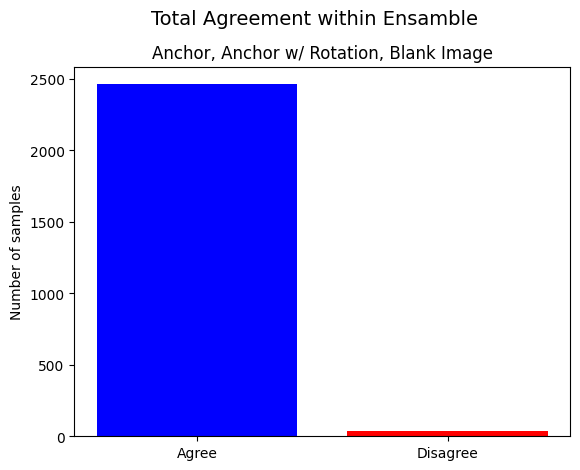

In [48]:
import torch
import numpy as np
from data.swarmset import ContinuingDataset, SwarmDataset
from networks.embedding import NoveltyEmbedding
from scipy import ndimage
from matplotlib import pyplot as plot

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

networkA = NoveltyEmbedding(out_size=15).to(device)
networkA.load_model("two_sensor_subz1")
networkA.eval()

networkB = NoveltyEmbedding(out_size=15).to(device)
networkB.load_model("two_sensor_nov_4")
networkB.eval()

networkC = NoveltyEmbedding(out_size=15).to(device)
networkC.load_model("two_sensors_r15_final")
networkC.eval()

def batch_eval_network(network, anchor_images, pos_images, neg_images):
    loss_fn = torch.nn.TripletMarginLoss(margin=15)
    anchor_out, pos_out, neg_out = network.batch_network_from_numpy(anchor_images, pos_images, neg_images)
    loss = loss_fn(anchor_out, pos_out, neg_out)
    return loss

def biased_log(x):
    if x == 0:
        return 0.0
    return np.log(x)

def trip_eq(a, b, c):
    return a == b and b == c and a == c

def getDisagreement(anchor, negative):
    pos_images = np.stack([
        # [ndimage.rotate(anchor, 90)],
        # [ndimage.rotate(anchor, 180)],
        # [ndimage.rotate(anchor, 270)],
        [ndimage.gaussian_filter(anchor, 1)],
        [ndimage.gaussian_filter(anchor, 3)],
        [ndimage.gaussian_filter(anchor, 5)],
    ])

    anchor_images = np.stack([[anchor] for _ in pos_images])
    neg_images = np.stack([[negative] for _ in pos_images])

    lossA = batch_eval_network(networkA, anchor_images, pos_images, neg_images)
    lossA = lossA.detach().cpu()

    lossB = batch_eval_network(networkB, anchor_images, pos_images, neg_images)
    lossB = lossB.detach().cpu()

    lossC = batch_eval_network(networkC, anchor_images, pos_images, neg_images)
    lossC = lossC.detach().cpu()

    return lossA, lossB, lossC
    # return (lossA * biased_log(lossA)) + (lossB * biased_log(lossB)) + (lossC * biased_log(lossC)), (lossA, lossB, lossC)

sampled_dataset = SwarmDataset("data/full-dual-sensors", rank=0)

disagreements = []
total_disagreements = 0
# for i in range(len(sampled_dataset)):
#     for j in range(i, len(sampled_dataset)):

for i in range(500):
    for j in range(i, i + 5):
        print(f"Sampling Anchors from {i}-{j}")
        anchor = sampled_dataset[i][0]
        negative = sampled_dataset[j][0]

        lA, lB, lC = getDisagreement(anchor, negative)
        d = int(not trip_eq(lA == 0.0, lB == 0.0, lC == 0.0))
        disagreements.append(d)
        if d > 0:
            total_disagreements += 1

# for i in range(2500):
#     print(f"Sampling Anchors from {i}-blank")
#     anchor = sampled_dataset[i][0]
#     negative = np.zeros((500, 500))
#
#     lA, lB, lC = getDisagreement(anchor, negative)
#     d = int(not trip_eq(lA == 0.0, lB == 0.0, lC == 0.0))
#     disagreements.append(d)
#     if d > 0:
#         total_disagreements += 1

for i in range(len(disagreements)):
    if disagreements[i] != 0:
        disagreements[i] = 1

print(f"Total Disagreement: {total_disagreements}")
plot.bar([0, 1], [len(disagreements) - total_disagreements, total_disagreements], color=[(0,0,1), (1,0,0)])
plot.suptitle("Total Agreement within Ensamble", y=1.0, fontsize=14)
plot.title("Anchor, Anchor w/ Blur, Negative")
plot.ylabel("Number of samples")
plot.xticks([0, 1], ["Agree", "Disagree"])
plot.show()

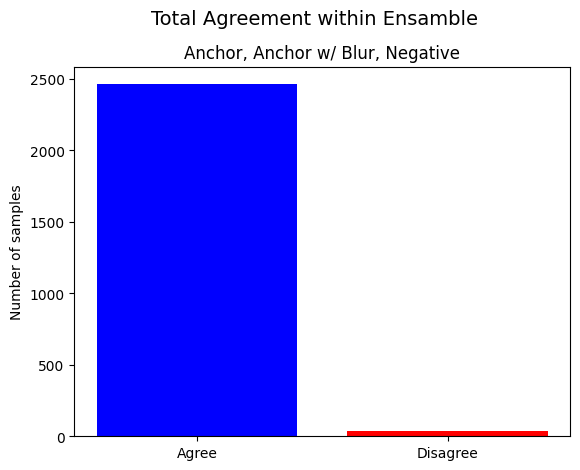

In [49]:
plot.bar([0, 1], [len(disagreements) - total_disagreements, total_disagreements], color=[(0,0,1), (1,0,0)])
plot.suptitle("Total Agreement within Ensamble", y=1.0, fontsize=14)
plot.title("Anchor, Anchor w/ Blur, Negative")
plot.ylabel("Number of samples")
plot.xticks([0, 1], ["Agree", "Disagree"])
plot.show()

# Binary Disagreement in Ensamble - Evolved Data

Sampling Anchors from 0-1
Sampling Anchors from 0-2
Sampling Anchors from 0-3
Sampling Anchors from 0-4
Sampling Anchors from 0-5
Sampling Anchors from 1-2
Sampling Anchors from 1-3
Sampling Anchors from 1-4
Sampling Anchors from 1-5
Sampling Anchors from 1-6
Sampling Anchors from 2-3
Sampling Anchors from 2-4
Sampling Anchors from 2-5
Sampling Anchors from 2-6
Sampling Anchors from 2-7
Sampling Anchors from 3-4
Sampling Anchors from 3-5
Sampling Anchors from 3-6
Sampling Anchors from 3-7
Sampling Anchors from 3-8
Sampling Anchors from 4-5
Sampling Anchors from 4-6
Sampling Anchors from 4-7
Sampling Anchors from 4-8
Sampling Anchors from 4-9
Sampling Anchors from 5-6
Sampling Anchors from 5-7
Sampling Anchors from 5-8
Sampling Anchors from 5-9
Sampling Anchors from 5-10
Sampling Anchors from 6-7
Sampling Anchors from 6-8
Sampling Anchors from 6-9
Sampling Anchors from 6-10
Sampling Anchors from 6-11
Sampling Anchors from 7-8
Sampling Anchors from 7-9
Sampling Anchors from 7-10
Sampling

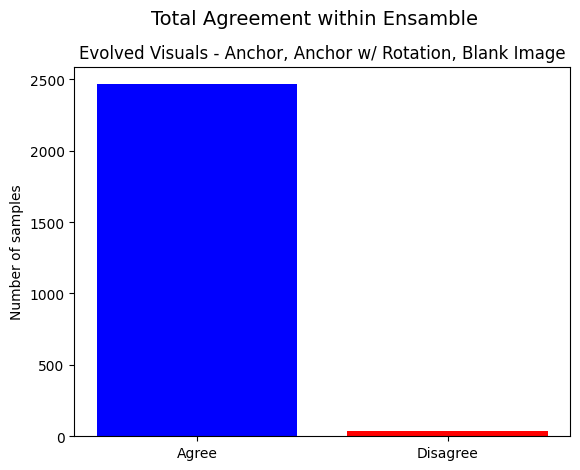

In [51]:
import torch
import numpy as np
from data.swarmset import ContinuingDataset, SwarmDataset
from networks.embedding import NoveltyEmbedding
from scipy import ndimage
from matplotlib import pyplot as plot

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

networkA = NoveltyEmbedding(out_size=15).to(device)
networkA.load_model("two_sensor_subz1")
networkA.eval()

networkB = NoveltyEmbedding(out_size=15).to(device)
networkB.load_model("two_sensor_nov_4")
networkB.eval()

networkC = NoveltyEmbedding(out_size=15).to(device)
networkC.load_model("two_sensors_r15_final")
networkC.eval()

parent_folder = "/home/connor/Desktop/SwarmsResults/AugmentedTests/Encoder_plus_original_bvec_Nov_7"
sub_folder = "data"
retrieved_data = ContinuingDataset(directory=parent_folder, create=False, folder_name=sub_folder)

archive = NoveltyArchive(
    pheno_file=os.path.join("/home/connor/Desktop/SwarmsResults/AugmentedTests/Encoder_plus_original_bvec_Nov_7/behaviors", "1667764573_b__1667801491.csv"),
    geno_file=os.path.join("/home/connor/Desktop/SwarmsResults/AugmentedTests/Encoder_plus_original_bvec_Nov_7/controllers", "1667764573_g__1667801491.csv"),
    absolute=True
)

def batch_eval_network(network, anchor_images, pos_images, neg_images):
    loss_fn = torch.nn.TripletMarginLoss(margin=15)
    anchor_out, pos_out, neg_out = network.batch_network_from_numpy(anchor_images, pos_images, neg_images)
    loss = loss_fn(anchor_out, pos_out, neg_out)
    return loss

def biased_log(x):
    if x == 0:
        return 0.0
    return np.log(x)

def trip_eq(a, b, c):
    return a == b and b == c and a == c

def getDisagreement(anchor, negative):
    pos_images = np.stack([
        [ndimage.rotate(anchor, 90)],
        [ndimage.rotate(anchor, 180)],
        [ndimage.rotate(anchor, 270)],
        # [ndimage.gaussian_filter(anchor, 1)],
        # [ndimage.gaussian_filter(anchor, 3)],
        # [ndimage.gaussian_filter(anchor, 5)],
    ])

    anchor_images = np.stack([[anchor] for _ in pos_images])
    neg_images = np.stack([[negative] for _ in pos_images])

    lossA = batch_eval_network(networkA, anchor_images, pos_images, neg_images)
    lossA = lossA.detach().cpu()

    lossB = batch_eval_network(networkB, anchor_images, pos_images, neg_images)
    lossB = lossB.detach().cpu()

    lossC = batch_eval_network(networkC, anchor_images, pos_images, neg_images)
    lossC = lossC.detach().cpu()

    return lossA, lossB, lossC
    # return (lossA * biased_log(lossA)) + (lossB * biased_log(lossB)) + (lossC * biased_log(lossC)), (lossA, lossB, lossC)

sampled_dataset = SwarmDataset("data/full-dual-sensors", rank=0)

disagreements = []
total_disagreements = 0
# for i in range(len(sampled_dataset)):
#     for j in range(i, len(sampled_dataset)):

for i in range(500):
    for j in range(i + 1, i + 6):
        print(f"Sampling Anchors from {i}-{j}")
        anchor = retrieved_data[i][0]
        negative = retrieved_data[j][0]

        lA, lB, lC = getDisagreement(anchor, negative)
        d = int(not trip_eq(lA == 0.0, lB == 0.0, lC == 0.0))
        disagreements.append(d)
        if d > 0:
            total_disagreements += 1

for i in range(len(disagreements)):
    if disagreements[i] != 0:
        disagreements[i] = 1

print(f"Total Disagreement: {total_disagreements}")
plot.bar([0, 1], [len(disagreements)  - total_disagreements, total_disagreements], color=[(0,0,1), (1,0,0)])
plot.suptitle("Total Agreement within Ensamble", y=1.0, fontsize=14)
plot.title("Evolved Visuals - Anchor, Anchor w/ Rotation, Blank Image")
plot.ylabel("Number of samples")
plot.xticks([0, 1], ["Agree", "Disagree"])
plot.show()

# Binary Disagreement Based on Sampling from Medoids

Pre-Computing for 6...
Sampling for 6...
Anchor 1902 - Positive 801 - Negative Cluster 1
Anchor 1902 - Positive 801 - Negative Cluster 2
Anchor 1902 - Positive 801 - Negative Cluster 3
Anchor 1902 - Positive 801 - Negative Cluster 5
Anchor 1902 - Positive 7419 - Negative Cluster 1
Anchor 1902 - Positive 7419 - Negative Cluster 3
Anchor 1902 - Positive 7419 - Negative Cluster 4
Anchor 1902 - Positive 7419 - Negative Cluster 5
Anchor 1902 - Positive 6724 - Negative Cluster 4
Anchor 1902 - Positive 6724 - Negative Cluster 5
Anchor 1902 - Positive 6724 - Negative Cluster 3
Anchor 1902 - Positive 6724 - Negative Cluster 1
Anchor 1902 - Positive 2192 - Negative Cluster 1
Anchor 1902 - Positive 2192 - Negative Cluster 5
Anchor 1902 - Positive 2192 - Negative Cluster 2
Anchor 1902 - Positive 2192 - Negative Cluster 3
Anchor 1902 - Positive 5687 - Negative Cluster 3
Anchor 1902 - Positive 5687 - Negative Cluster 1
Anchor 1902 - Positive 5687 - Negative Cluster 2
Anchor 1902 - Positive 5687 - Ne

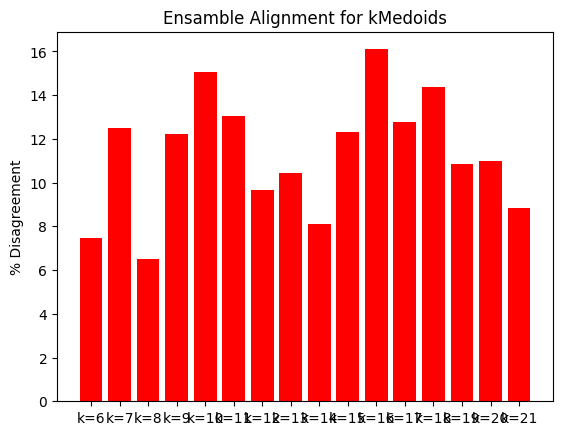

In [46]:
import torch
import os
import numpy as np
from data.swarmset import ContinuingDataset, SwarmDataset
from sklearn_extra.cluster import KMedoids
from networks.embedding import NoveltyEmbedding
from scipy import ndimage
from matplotlib import pyplot as plot
from NovelSwarmBehavior.novel_swarms.novelty.NoveltyArchive import NoveltyArchive
from sklearn.neighbors import NearestNeighbors

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

networkA = NoveltyEmbedding(out_size=15).to(device)
networkA.load_model("two_sensor_subz1")
networkA.eval()

networkB = NoveltyEmbedding(out_size=15).to(device)
networkB.load_model("two_sensor_nov_4")
networkB.eval()

networkC = NoveltyEmbedding(out_size=15).to(device)
networkC.load_model("two_sensors_r15_final")
networkC.eval()

parent_folder = "/home/connor/Desktop/SwarmsResults/AugmentedTests/Encoder_plus_original_bvec_Nov_7"
sub_folder = "data"
retrieved_data = ContinuingDataset(directory=parent_folder, create=False, folder_name=sub_folder)

archive = NoveltyArchive(
    pheno_file=os.path.join("/home/connor/Desktop/SwarmsResults/AugmentedTests/Encoder_plus_original_bvec_Nov_7/behaviors", "1667764573_b__1667801491.csv"),
    geno_file=os.path.join("/home/connor/Desktop/SwarmsResults/AugmentedTests/Encoder_plus_original_bvec_Nov_7/controllers", "1667764573_g__1667801491.csv"),
    absolute=True
)

def batch_eval_network(network, anchor_images, pos_images, neg_images):
    loss_fn = torch.nn.TripletMarginLoss(margin=15)
    anchor_out, pos_out, neg_out = network.batch_network_from_numpy(anchor_images, pos_images, neg_images)
    loss = loss_fn(anchor_out, pos_out, neg_out)
    return loss

def biased_log(x):
    if x == 0:
        return 0.0
    return np.log(x)

def trip_eq(a, b, c):
    return a == b and b == c and a == c

def getDisagreement(anchor, positive, negative):
    pos_images = np.stack([
        [ndimage.rotate(positive, 90)],
        [ndimage.rotate(positive, 180)],
        [ndimage.rotate(positive, 270)],
    ])

    anchor_images = np.stack([[anchor] for _ in pos_images])
    neg_images = np.stack([[negative] for _ in pos_images])

    lossA = batch_eval_network(networkA, anchor_images, pos_images, neg_images)
    lossA = lossA.detach().cpu()

    lossB = batch_eval_network(networkB, anchor_images, pos_images, neg_images)
    lossB = lossB.detach().cpu()

    lossC = batch_eval_network(networkC, anchor_images, pos_images, neg_images)
    lossC = lossC.detach().cpu()

    return lossA, lossB, lossC
    # return (lossA * biased_log(lossA)) + (lossB * biased_log(lossB)) + (lossC * biased_log(lossC)), (lossA, lossB, lossC)

sampled_dataset = SwarmDataset("data/full-dual-sensors", rank=0)
disagreements = []
total_disagreements = 0

MIN_K, MAX_K = 6, 22
SKIP = 1
SELECT_CLUSTERS = 5
SELECT_SAME = 15
SELECT_DIFF_EACH = 3

for k in range(MIN_K, MAX_K, SKIP):
    print(f"Pre-Computing for {k}...")
    total = 0
    k_disagreement_cnt = 0
    kmedoids = KMedoids(n_clusters=k, random_state=0).fit(archive.archive)
    medoids = kmedoids.medoid_indices_
    labels = kmedoids.labels_
    clusters = { l : [] for l in range(k)}
    nn = {l : None for l in range(k)}

    # Sort the labels into clusters ahead of time - O(n)
    for i, label in enumerate(labels):
        clusters[label].append(i)

    # Initialize the nearest neighbors scheme for each cluster
    # for i in range(k):
    #     NEAREST = 1
    #     pool = [archive.archive[j] for j in clusters[i]]
    #     nn[i] = NearestNeighbors(n_neighbors=NEAREST, algorithm='ball_tree').fit(pool)

    print(f"Sampling for {k}...")
    for i in np.random.choice([p for p in range(k)], SELECT_CLUSTERS, replace=False):
        medoid = medoids[i]
        anchor = retrieved_data[medoid][0]
        # for m in range(k):
        #     if m != i:
        #         # Select the element of the cluster that is closest to the medoid of the cluster in question.
        #         negative = archive.archive[medoids[m]]
        #         nearest_neighbor = nn[i].kneighbors(negative)[0]
        #         index = -1
        #         for s in clusters[i]:
        #             if archive.archive[s] == nearest_neighbor:
        #                 index = s
        #                 break


        for j in np.random.choice(clusters[i], min(SELECT_SAME, len(clusters[i])), replace=False):
            positive = retrieved_data[j][0]
            counter = 0
            for m in np.random.choice([p for p in range(k)], SELECT_CLUSTERS + 1, replace=False):
                counter += 1
                if m != i and counter != SELECT_CLUSTERS:
                    print(f"Anchor {medoid} - Positive {j} - Negative Cluster {m}")
                    for n in np.random.choice(clusters[m], min(SELECT_DIFF_EACH, len(clusters[m])), replace=False):
                        if n >= len(sampled_dataset):
                            continue
                        negative = retrieved_data[n][0]
                        lA, lB, lC = getDisagreement(anchor, positive, negative)
                        d = int(lA > 0.0) + int(lB > 0.0) + int(lC > 0.0)
                        total += 1
                        if d >= 3:
                            k_disagreement_cnt += 1

    disagreements.append(k_disagreement_cnt * 100 / total)
    print(f"Total Disagreement for k={k}: {k_disagreement_cnt}")


plot.bar([i for i in range(MIN_K, MAX_K, SKIP)], disagreements, color=(1, 0, 0))
plot.title("Ensamble Alignment for kMedoids")
plot.ylabel("% Disagreement")
plot.xticks([i for i in range(MIN_K, MAX_K, SKIP)], [f"k={i}" for i in range(MIN_K, MAX_K, SKIP)])
plot.show()

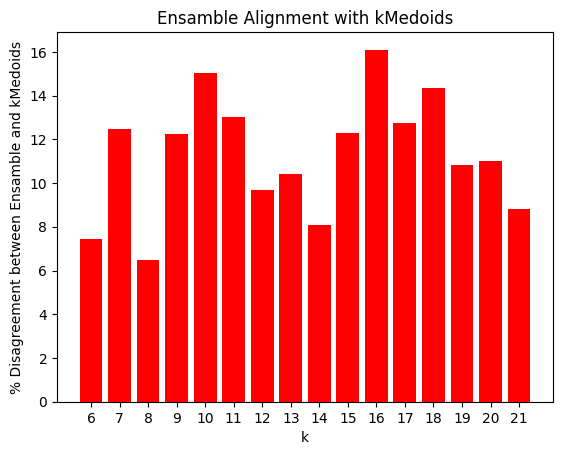

In [47]:
plot.bar([i for i in range(MIN_K, MAX_K)], disagreements, color=(1, 0, 0))
plot.title("Ensamble Alignment with kMedoids")
plot.ylabel("% Disagreement between Ensamble and kMedoids")
plot.xlabel("k")
plot.xticks([i for i in range(MIN_K, MAX_K)], [f"{i}" for i in range(MIN_K, MAX_K)])
plot.show()